In [137]:
import pandas as pd
import numpy as np
import caveclient
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import tqdm
from nglui.statebuilder.helpers import *

In [138]:
client=caveclient.CAVEclient('minnie65_phase3_v1')

In [139]:
client.materialize.get_tables()

['allen_column_basket_molecular',
 'allen_column_bodor_surround_inhib',
 'proofreading_functional_coreg_v2',
 'proofreading_functional_coreg',
 'bodor_pt_cells',
 'nucleus_neuron_svm',
 'functional_coreg',
 'allen_v1_column_thalamic',
 'proofreading_status_public_release',
 'allen_column_l5it_types',
 'func_unit_em_match_release',
 'aibs_column_nonneuronal',
 'pt_synapse_targets',
 'cg_cell_type_calls',
 'l5_mc_cg',
 'baylor_e_i_model_v1',
 'allen_neuron_nonneuron_svm_v0',
 'allen_class_type_svm_v0',
 'allen_subclass_type_svm_v0',
 'allen_v1_column_pyc_proof',
 'allen_v1_column_types_slanted',
 'allen_minnie_extra_types',
 'allen_v1_column_types_v3',
 'allen_v1_column_types_v2',
 'allen_soma_coarse_cell_class_model_v2',
 'allen_soma_coarse_cell_class_model_v1',
 'synapses_pni_2',
 'nucleus_detection_v0',
 'allen_v1_column_proofreading',
 'column_excitatory_subgroups_pheno',
 'slant_data_subtypes',
 'slant_data_subtypes_v2',
 'aibs_soma_nuc_metamodel_preds_v117',
 'bodor_pt_target_proof

In [140]:
now = datetime.datetime.utcnow()
#now = None

In [141]:
prf_df = client.materialize.query_table('proofreading_status_public_release', 
                                        filter_in_dict={'status_axon':['extended', 'clean']},
                                        timestamp=now)

In [142]:
ct_df = client.materialize.query_table('aibs_soma_nuc_metamodel_preds_v117', timestamp=now)

In [143]:
prf_df.merge(ct_df, on='pt_root_id').query('classification_system!="aibs_neuronal"')

,id_x,valid_x,pt_supervoxel_id_x,pt_root_id,valid_id,status_dendrite,status_axon,pt_position_x,id_y,valid_y,target_id,classification_system,cell_type,id_ref,valid__ref,volume,pt_supervoxel_id_y,pt_position_y,bb_start_position,bb_end_position
366,848,t,88613628617886456,864691135081875959,864691135081875959,clean,clean,"[173488, 205136, 21395]",48717,t,267189,aibs_nonneuronal,astrocyte,267189,t,173.203456,88613628617886456,"[173488, 205136, 21395]","[nan, nan, nan]","[nan, nan, nan]"
367,849,t,88543397513921624,864691136436613534,864691136436613534,clean,clean,"[172976, 206192, 22848]",66108,t,267401,aibs_nonneuronal,astrocyte,267401,t,181.282243,88543397513921624,"[172976, 206192, 22848]","[nan, nan, nan]","[nan, nan, nan]"
368,850,t,89806392642514915,864691135354885583,864691135354885583,clean,clean,"[181984, 179216, 21717]",86160,t,301084,aibs_nonneuronal,astrocyte,301084,t,169.709240,89806392642514915,"[181984, 179216, 21717]","[nan, nan, nan]","[nan, nan, nan]"
369,851,t,91503351468098326,864691135358828888,864691135358828888,clean,clean,"[194496, 239360, 22163]",39680,t,307055,aibs_nonneuronal,astrocyte,307055,t,165.967626,91503351468098326,"[194496, 239360, 22163]","[nan, nan, nan]","[nan, nan, nan]"
370,852,t,90516746141867881,864691136443755907,864691136443755907,clean,clean,"[187104, 228672, 23654]",4358,t,307210,aibs_nonneuronal,astrocyte,307210,t,151.198106,90516746141867881,"[187104, 228672, 23654]","[nan, nan, nan]","[nan, nan, nan]"
371,853,t,90025951639391561,864691135012370678,864691135012370678,clean,clean,"[183488, 242208, 23958]",34823,t,309347,aibs_nonneuronal,astrocyte,309347,t,151.703388,90025951639391561,"[183488, 242208, 23958]","[nan, nan, nan]","[nan, nan, nan]"
372,856,t,90230529185717347,864691136237835836,864691136237835836,clean,clean,"[185168, 193328, 21098]",38118,t,303055,aibs_nonneuronal,microglia,303055,t,69.703762,90230529185717347,"[185168, 193328, 21098]","[nan, nan, nan]","[nan, nan, nan]"
373,857,t,91712052519172504,864691135118155485,864691135118155485,clean,clean,"[195776, 221536, 22411]",1976,t,305126,aibs_nonneuronal,microglia,305126,t,73.864806,91712052519172504,"[195776, 221536, 22411]","[nan, nan, nan]","[nan, nan, nan]"
374,858,t,90513722015525604,864691136194411734,864691136194411734,clean,clean,"[187120, 206128, 20428]",33426,t,302974,aibs_nonneuronal,microglia,302974,t,76.764774,90513722015525604,"[187120, 206128, 20428]","[nan, nan, nan]","[nan, nan, nan]"
375,859,t,89244267121469623,864691136227302225,864691136227302225,clean,clean,"[178064, 185248, 20156]",81477,t,264743,aibs_nonneuronal,microglia,264743,t,80.122348,89244267121469623,"[178064, 185248, 20156]","[nan, nan, nan]","[nan, nan, nan]"


In [157]:
pyc_types = ["5P-ET","23P","5P-IT","4P","6P-IT","6P-CT"]
for pct in pyc_types:
    ct_df.cell_type[ct_df.cell_type==pct]="PYC"


/var/folders/kx/xq42kw197c5_qw6kxgnr4nkr0000gq/T/ipykernel_21535/4078364845.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ct_df.cell_type[ct_df.cell_type==pct]="PYC"


(0.0, 450.0)

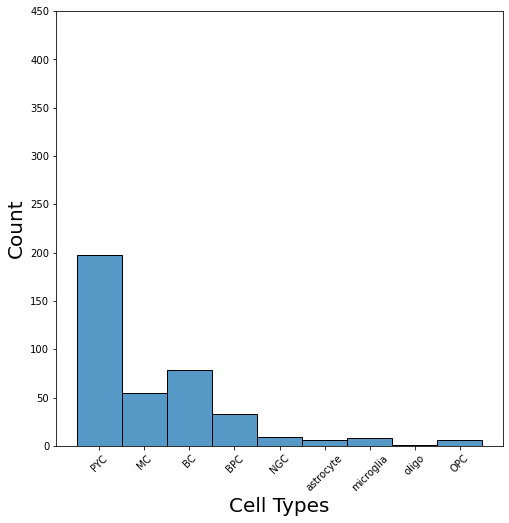

In [158]:
f ,ax = plt.subplots(figsize=(8,8))
sns.histplot(data=prf_df.merge(ct_df, on='pt_root_id'), x='cell_type', ax=ax)
ax.set_xlabel('Cell Types',size=20)
ax.set_ylabel('Count', size=20)
plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
ax.set_ylim(0,450)

In [ ]:

pre_ids_blocks = np.array_split(axon_df.pt_root_id.values, 40)
syn_dfs = []

for block in tqdm.tqdm_notebook(pre_ids_blocks):
    
    syn_dfs.append(client.materialize.synapse_query(pre_ids=block,
                                          split_positions=True,
                                          desired_resolution=[1000,1000,1000]))
for df in syn_dfs:
    df.attrs={}
syn_df=pd.concat(syn_dfs)

In [145]:
#selected_ann_df=prf_axons.merge(ct_df, on='pt_root_id').query('cell_type=="23P"')

In [146]:
prf_thal_ids= [ 1,  2,  3,  4, 5, 6,  7,  8, 10, 16,18, 23, 25, 27,29, 31, 37, 41]
selected_ann_df=client.materialize.query_table('allen_v1_column_thalamic', 
                                       filter_in_dict={'id':prf_thal_ids},timestamp=now)

In [159]:

pre_ids_blocks = np.array_split(prf_df.pt_root_id.values, 40)
syn_dfs = []

for block in tqdm.tqdm_notebook(pre_ids_blocks):
    
    syn_dfs.append(client.materialize.synapse_query(pre_ids=block,
                                          split_positions=True,
                                          desired_resolution=[1000,1000,1000],
                                          timestamp=now))
for df in syn_dfs:
    df.attrs={}
syn_df=pd.concat(syn_dfs)

/var/folders/kx/xq42kw197c5_qw6kxgnr4nkr0000gq/T/ipykernel_21535/661280024.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for block in tqdm.tqdm_notebook(pre_ids_blocks):


  0%|          | 0/40 [00:00<?, ?it/s]

In [160]:
n_outputs = syn_df.groupby('pre_pt_root_id').id.count().reset_index()

In [161]:
n_outputs.columns=['pre_pt_root_id', 'n_syn']
n_outputs.merge(ct_df, left_on='pre_pt_root_id', right_on='pt_root_id')

,pre_pt_root_id,n_syn,id,valid,target_id,classification_system,cell_type,id_ref,valid__ref,volume,pt_supervoxel_id,pt_root_id,pt_position,bb_start_position,bb_end_position
0,864691134884807418,571,20571,t,518848,aibs_neuronal,PYC,518848,t,361.310945,105913344770743552,864691134884807418,"[299088, 123184, 22989]","[nan, nan, nan]","[nan, nan, nan]"
1,864691134940133219,1517,43830,t,230650,aibs_neuronal,PYC,230650,t,275.570033,85304373764592796,864691134940133219,"[149408, 190672, 23370]","[nan, nan, nan]","[nan, nan, nan]"
2,864691134988722810,874,25708,t,259167,aibs_neuronal,PYC,259167,t,350.865490,89096658423664464,864691134988722810,"[176688, 134224, 25805]","[nan, nan, nan]","[nan, nan, nan]"
3,864691135012370678,43,34823,t,309347,aibs_nonneuronal,astrocyte,309347,t,151.703388,90025951639391561,864691135012370678,"[183488, 242208, 23958]","[nan, nan, nan]","[nan, nan, nan]"
4,864691135013115542,233,66273,t,518312,aibs_neuronal,PYC,518312,t,320.683213,105911832606508779,864691135013115542,"[299552, 112272, 20246]","[nan, nan, nan]","[nan, nan, nan]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388,864691137053906294,9383,52005,t,301107,aibs_neuronal,MC,301107,t,354.960671,90863710511363593,864691137053906294,"[189600, 192320, 21518]","[nan, nan, nan]","[nan, nan, nan]"
389,864691137053995126,6157,3442,t,294749,aibs_neuronal,BC,294749,t,361.953198,91137763852205616,864691137053995126,"[191712, 136928, 22487]","[nan, nan, nan]","[nan, nan, nan]"
390,864691137197329985,131,5969,t,260468,aibs_neuronal,BPC,260468,t,215.031480,89239800355525240,864691137197329985,"[178176, 152192, 20167]","[nan, nan, nan]","[nan, nan, nan]"
391,864691137197333569,13,80862,t,260546,aibs_nonneuronal,microglia,260546,t,91.770061,89029381384636158,864691137197333569,"[176240, 157376, 20508]","[nan, nan, nan]","[nan, nan, nan]"


Text(0.5, 0, 'Cell Class')

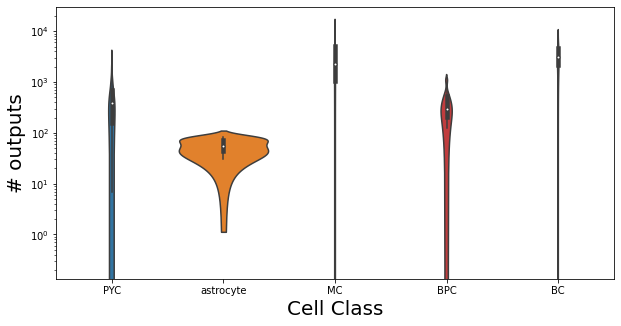

In [164]:
newdf = n_outputs.merge(ct_df, 
left_on='pre_pt_root_id', 
right_on='pt_root_id')
newdf=newdf[~newdf.cell_type.isin(['microglia', 'NGC', 'OPC', 'oligo', 'astrocyte'])]
f, ax= plt.subplots(figsize=(10,5))
sns.violinplot(data=newdf,x='cell_type',y='n_syn' )
ax.set_yscale('log')
ax.set_ylabel('# outputs', size=20)
ax.set_xlabel('Cell Class', size=20)

In [108]:
syn_df=syn_df.drop(['valid','pre_pt_supervoxel_id','post_pt_supervoxel_id','pre_pt_position_x','pre_pt_position_y','pre_pt_position_z',
            'post_pt_position_x','post_pt_position_y','post_pt_position_z'],axis=1)

In [147]:
tuning_df = pd.read_feather('tuning_curve_oracle.feather')
tuning_df=tuning_df.rename({'scan_session':'session'}, axis=1)

In [148]:
tuning_df['dsi']=tuning_df.dsi.clip(0,np.percentile(tuning_df.dsi,[99])[0])
tuning_df['osi']=tuning_df.dsi.clip(0,np.percentile(tuning_df.osi,[99])[0])

In [149]:
coreg_df = client.materialize.query_table('functional_coreg', timestamp=now)
coreg_df=coreg_df.drop(['valid', 'pt_supervoxel_id', 'pt_position'], axis=1)
mei_df = pd.read_pickle('/Users/forrestc/Dropbox/dynamic_static_mei.pkl')


nrn_df = client.materialize.query_table('nucleus_neuron_svm', 
                                        split_positions=True,
                                        desired_resolution=[1000,1000,1000],
                                        filter_equal_dict={'cell_type':'neuron'}, 
                                        timestamp=now)
nrn_df=nrn_df.drop(['valid','pt_supervoxel_id', 'classification_system', 'cell_type'],axis=1)

In [150]:
model_tuning_df = pd.read_feather('orientation.feather')

In [151]:
model_tuning_df=model_tuning_df.query('success==1')
model_tuning_df=model_tuning_df.drop(['animal_id','behavior_id', 'timing_id', 'response_id', 'valid_id', 
                     'unique_id', 'pipe_version', 'segmentation_method', 'success'], axis=1)

In [152]:
model_tuning_df['pref_ori']=model_tuning_df.mu % np.pi
model_tuning_df=model_tuning_df.rename({'scan_session':'session', 
                                        'mu':'pref_dir'}, axis=1)


In [153]:
tuning_df = pd.merge(tuning_df, model_tuning_df, on=['session', 'scan_idx','unit_id'], suffixes=["","_model"])

In [154]:
tuning_coreg=pd.merge(tuning_df, coreg_df, on=['session','scan_idx', 'unit_id'])
tuning_coreg=tuning_coreg.drop(['animal_id'],axis=1)

In [156]:
tuning_coreg.sort_values('dsi', ascending=False)

,session,scan_idx,unit_id,direction,response_mean,osi,dsi,pref_dir,pref_ori,oracle,...,osi_model,dsi_model,amp,uniform_mse,direction_model,response_mean_model,response_std,pref_ori_model,id,pt_root_id
7830,9,3,2259,"[0.0, 0.3839724354387525, 0.7853981633974483, ...","[1.056, 1.57945, 3.45906, 5.64061, 6.35724, 6....",0.376218,0.376218,1.59590,1.595900,0.192898,...,0.288105,0.359219,1.631570,1.294970,"[0.0, 0.0, 0.3839724354387525, 0.3839724354387...","[0.848905, 0.848905, 0.917185, 0.917185, 1.231...","[0.244953, 0.244953, 0.220719, 0.220719, 0.314...",1.859990,4203,864691136134415755
196,4,7,3196,"[0.0, 0.3839724354387525, 0.7853981633974483, ...","[0.288726, 0.359734, 0.530985, 0.539048, 0.453...",0.376218,0.376218,4.25706,1.115467,0.193652,...,0.184281,0.277008,0.366026,0.032637,"[0.0, 0.0, 0.0, 0.3839724354387525, 0.38397243...","[0.175462, 0.175462, 0.175462, 0.201428, 0.201...","[0.0706671, 0.0706671, 0.0706671, 0.0835089, 0...",1.249607,7022,864691135385621845
7810,9,3,2126,"[0.0, 0.3839724354387525, 0.7853981633974483, ...","[1.1721, 0.927136, 0.57725, 0.341764, 0.338539...",0.376218,0.376218,3.05386,3.053860,0.250687,...,0.336568,0.293131,0.826422,0.287925,"[0.0, 0.0, 0.3839724354387525, 0.3839724354387...","[0.736638, 0.736638, 0.569951, 0.569951, 0.371...","[0.301707, 0.301707, 0.23069, 0.23069, 0.17558...",2.985720,2087,864691135366937337
2308,6,2,1405,"[0.0, 0.3839724354387525, 0.7853981633974483, ...","[0.197404, 0.227794, 0.12039, 0.0555308, 0.040...",0.376218,0.376218,3.39775,0.256157,0.128852,...,0.428437,0.284144,0.442570,0.116837,"[0.0, 0.3839724354387525, 0.7853981633974483, ...","[0.492613, 0.485624, 0.266622, 0.16262, 0.1433...","[0.109848, 0.140916, 0.0909218, 0.0656224, 0.0...",0.171857,8017,864691135865577093
4400,6,6,6249,"[0.0, 0.3839724354387525, 0.7853981633974483, ...","[0.354626, 0.238064, 0.223042, 0.191003, 0.226...",0.376218,0.376218,5.45338,2.311787,0.358060,...,0.301183,0.314158,0.445297,0.101495,"[0.0, 0.0, 0.0, 0.3839724354387525, 0.38397243...","[0.476555, 0.476555, 0.476555, 0.350234, 0.350...","[0.1472, 0.1472, 0.1472, 0.117721, 0.117721, 0...",2.359537,1248,864691135210042304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5109,6,7,6998,"[0.0, 0.3839724354387525, 0.7853981633974483, ...","[0.414849, 0.34217, 0.23695, 0.274447, 0.28196...",0.001531,0.001531,3.18828,0.046687,0.284212,...,0.101108,0.042112,0.172758,0.001577,"[0.0, 0.0, 0.0, 0.3839724354387525, 0.38397243...","[0.23649, 0.23649, 0.23649, 0.232579, 0.232579...","[0.0603064, 0.0603064, 0.0603064, 0.0650109, 0...",0.185185,1437,864691135771638523
2140,5,7,7202,"[0.0, 0.3839724354387525, 0.7853981633974483, ...","[0.202016, 0.22849, 0.494315, 1.65082, 3.86945...",0.001323,0.001323,4.76272,1.621127,0.179718,...,0.511121,0.024517,1.725140,1.822890,"[0.0, 0.0, 0.0, 0.3839724354387525, 0.38397243...","[0.487088, 0.487088, 0.487088, 0.550338, 0.550...","[0.155547, 0.155547, 0.155547, 0.185996, 0.185...",1.594950,4688,864691135946091812
8525,9,4,4301,"[0.0, 0.3839724354387525, 0.7853981633974483, ...","[0.862353, 0.82402, 0.927923, 0.827669, 0.8122...",0.000947,0.000947,5.49099,2.349397,0.087550,...,0.119092,0.018774,0.849311,0.023668,"[0.0, 0.0, 0.3839724354387525, 0.3839724354387...","[1.0176, 1.0176, 1.0128, 1.0128, 0.988567, 0.9...","[0.115877, 0.115877, 0.126747, 0.126747, 0.120...",0.153057,2253,864691136143390004
8737,9,4,7078,"[0.0, 0.3839724354387525, 0.7853981633974483, ...","[0.522952, 0.487181, 0.512898, 0.563113, 0.565...",0.000554,0.000554,2.05102,2.051020,0.217622,...,0.061530,0.029620,0.588267,0.003493,"[0.0, 0.0, 0.3839724354387525, 0.3839724354387...","[0.650722, 0.650722, 0.599442, 0.599442, 0.533...","[0.0543175, 0.0543175, 0.0469417, 0.0469417, 0...",3.130530,2303,864691136194201064


In [117]:
conn_df = syn_df.groupby(['pre_pt_root_id', 'post_pt_root_id']).aggregate({'size':[np.sum, len]})
conn_df.columns=['sum_size', 'n_syn']
conn_df=conn_df.reset_index()
conn_df['id']=np.arange(0,len(conn_df))

In [118]:
non_conn_dfm = pd.merge(conn_df, nrn_df, left_on='post_pt_root_id', right_on='pt_root_id', how='left')

In [119]:
syn_df.query('pre_pt_root_id==864691136390881407').query('post_pt_root_id==864691131557172312')

,id,pre_pt_root_id,post_pt_root_id,ctr_pt_position_x,ctr_pt_position_y,ctr_pt_position_z,size


In [120]:
# fix_id=864691136390881407
# post_ids = non_conn_dfm[non_conn_dfm.pt_root_id.isna()].query(f'pre_pt_root_id=={fix_id}').sort_values('sum_size', ascending=False).post_pt_root_id
# orphan_df=client.materialize.synapse_query(pre_ids=fix_id, post_ids=post_ids.values, timestamp=now).sort_values('size', ascending=False)
# sb=make_point_statebuilder(client, point_column='ctr_pt_position', linked_seg_column=['pre_pt_root_id', 'post_pt_root_id'])
# package_state(orphan_df, sb, client, 'always', 'html', client.info.viewer_site, 'link')


In [121]:
con_dfm = pd.merge(conn_df, nrn_df, left_on='post_pt_root_id', right_on='pt_root_id', how='inner')
con_dfm=con_dfm.drop_duplicates(subset=['id_x'], keep=False)

In [122]:
ct_conn_df = pd.merge(con_dfm, ct_df, on='pt_root_id')

In [123]:
con_tuning=pd.merge(con_dfm, tuning_coreg, on='pt_root_id')


In [124]:
axon_grps =con_tuning.groupby('pre_pt_root_id')

In [125]:
dir_norm = plt.Normalize(0, np.pi*2)
ori_norm = plt.Normalize(0, np.pi)
size_norm = plt.Normalize(10000,80000)
        

In [126]:
axon_grps=sorted(axon_grps, key = lambda x: len(x[1]), reverse=True)

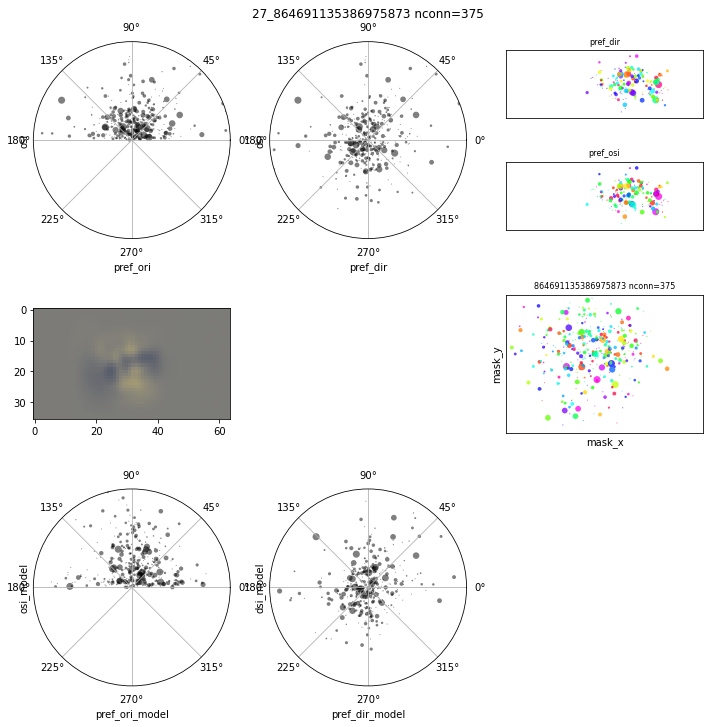

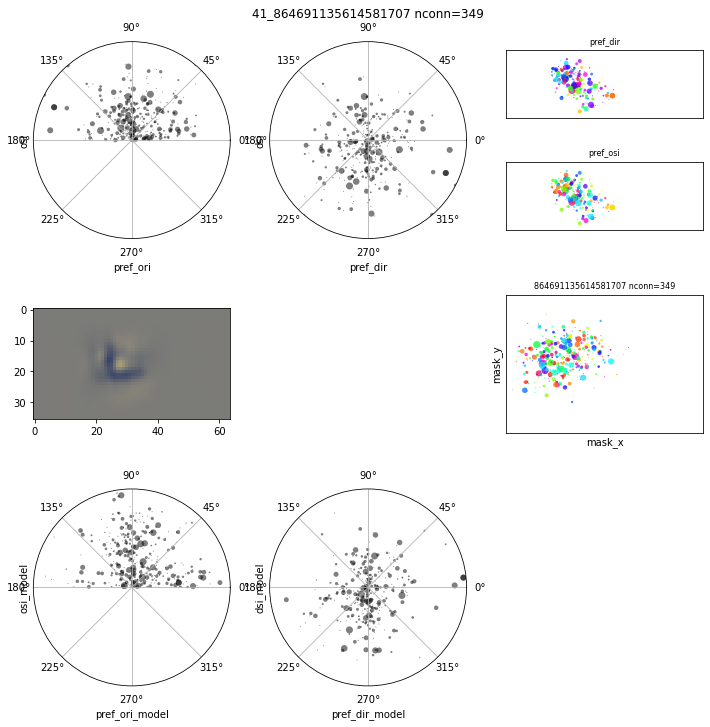

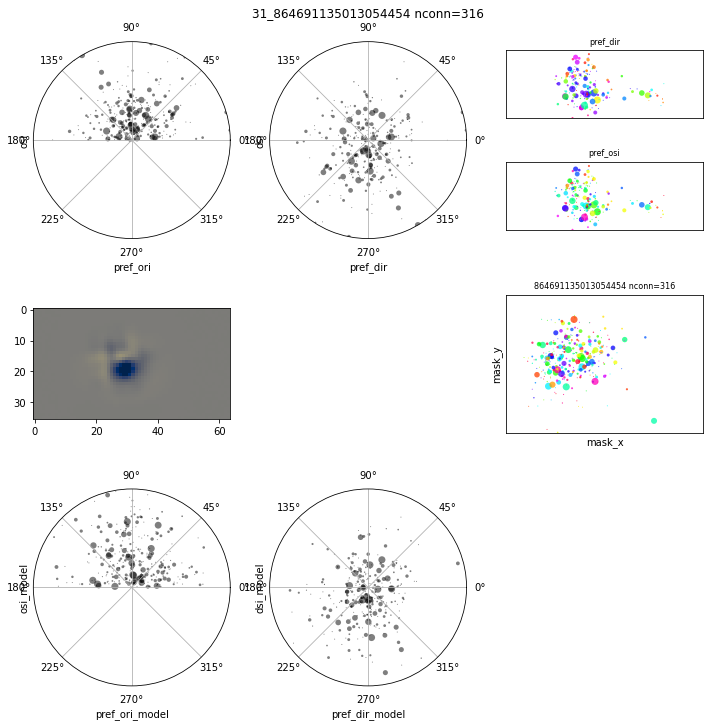

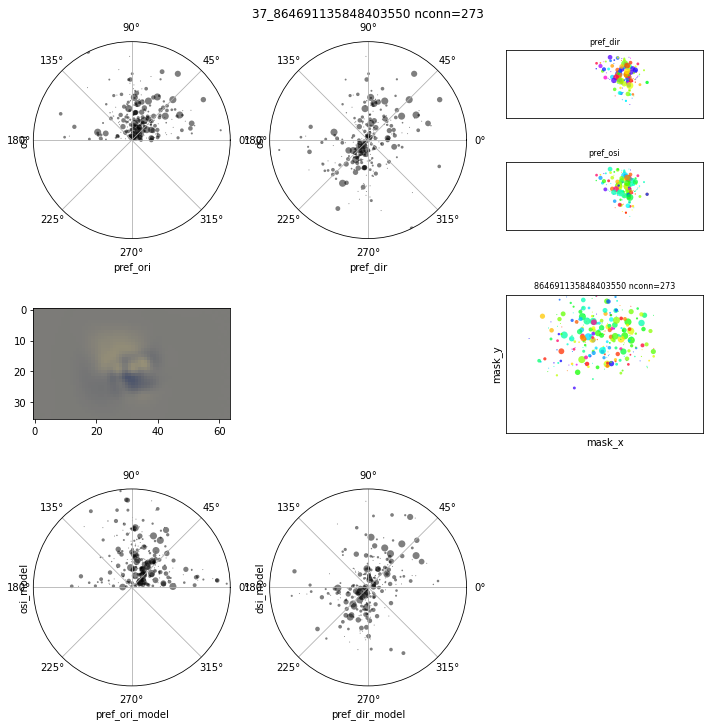

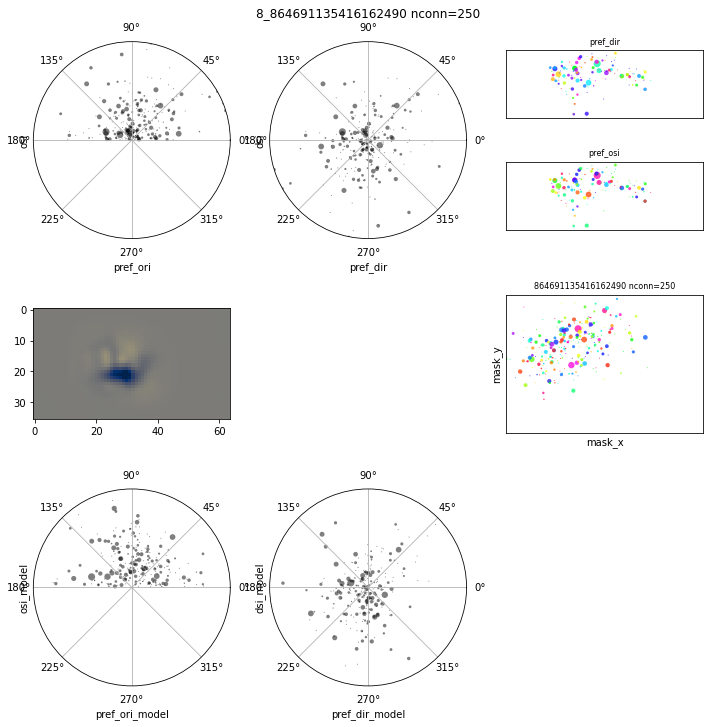

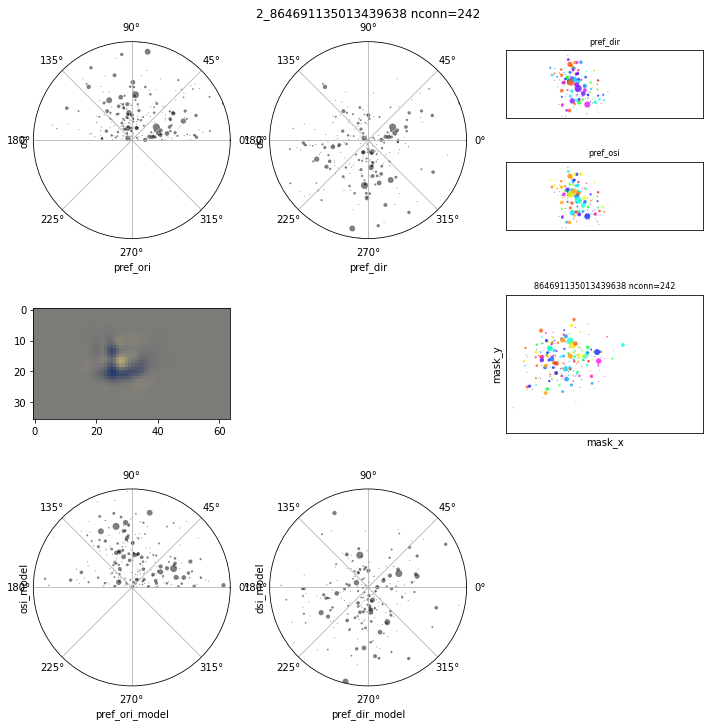

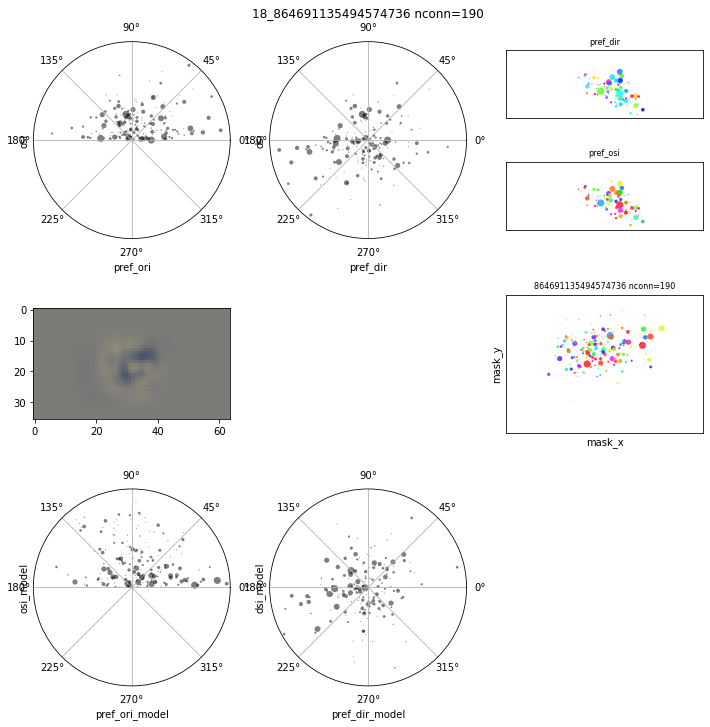

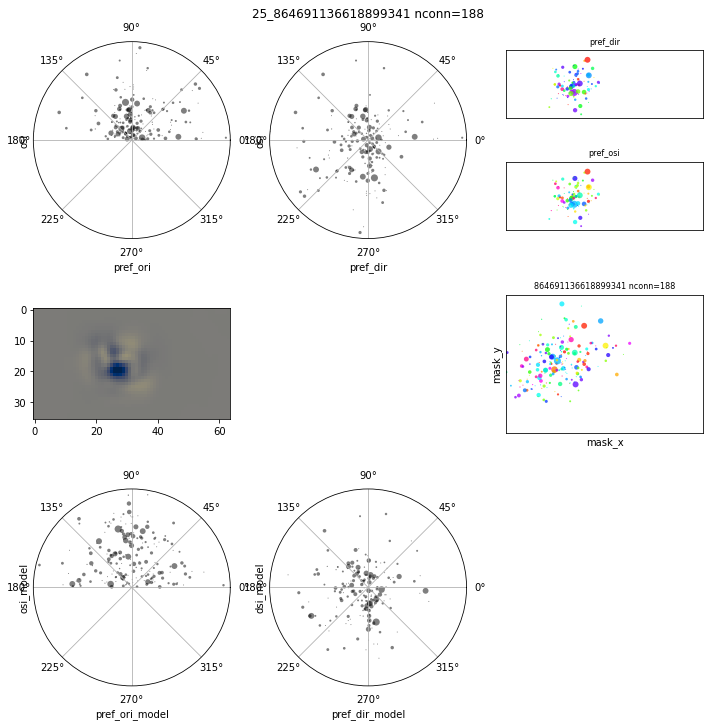

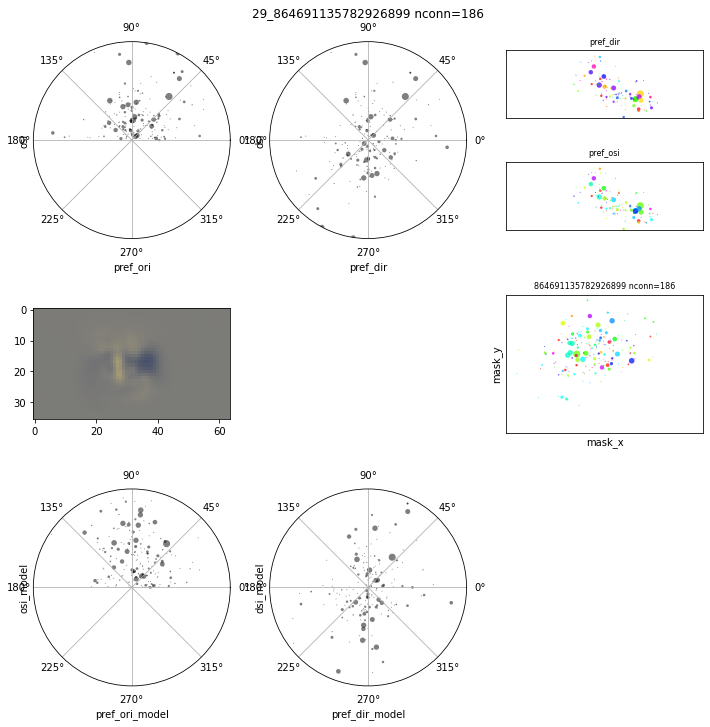

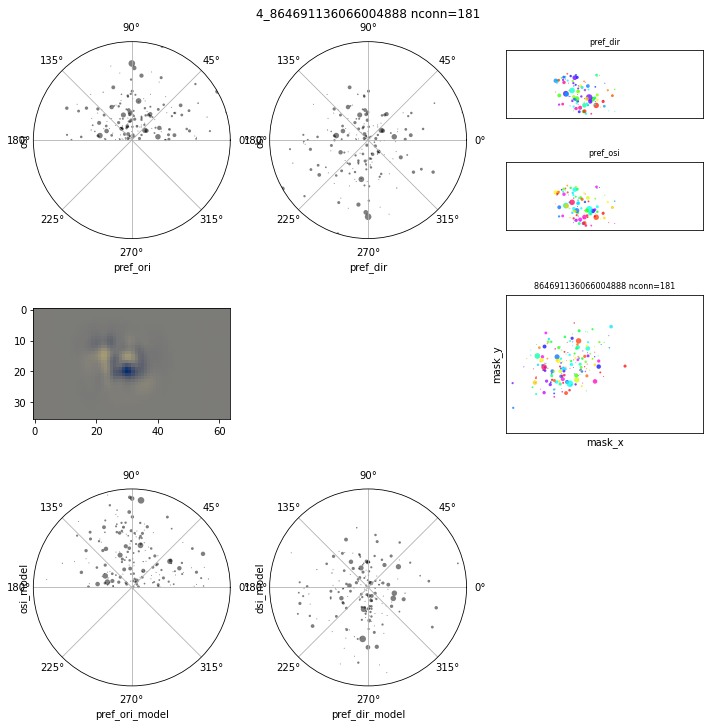

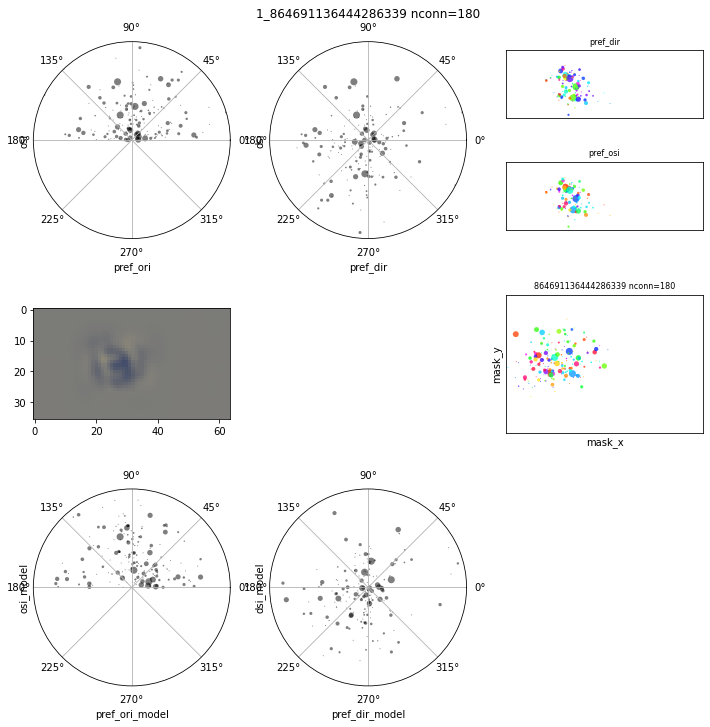

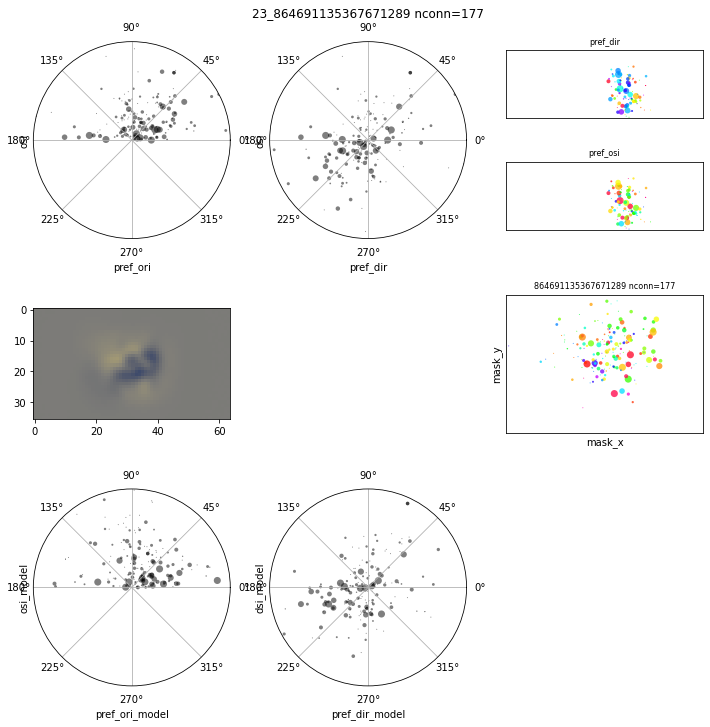

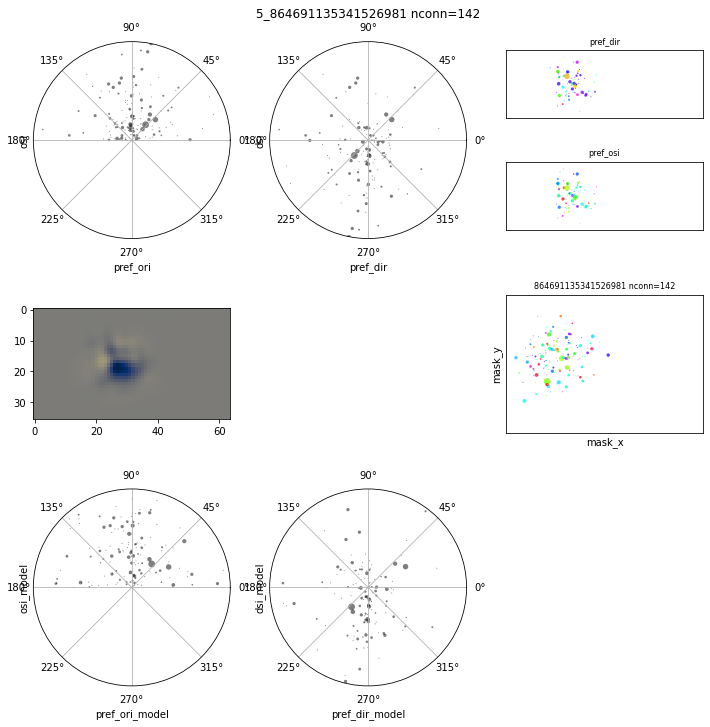

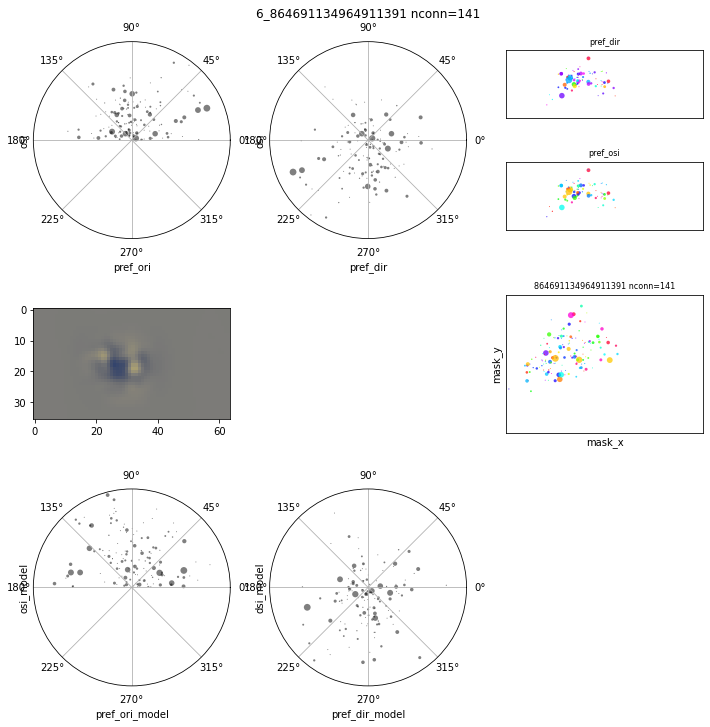

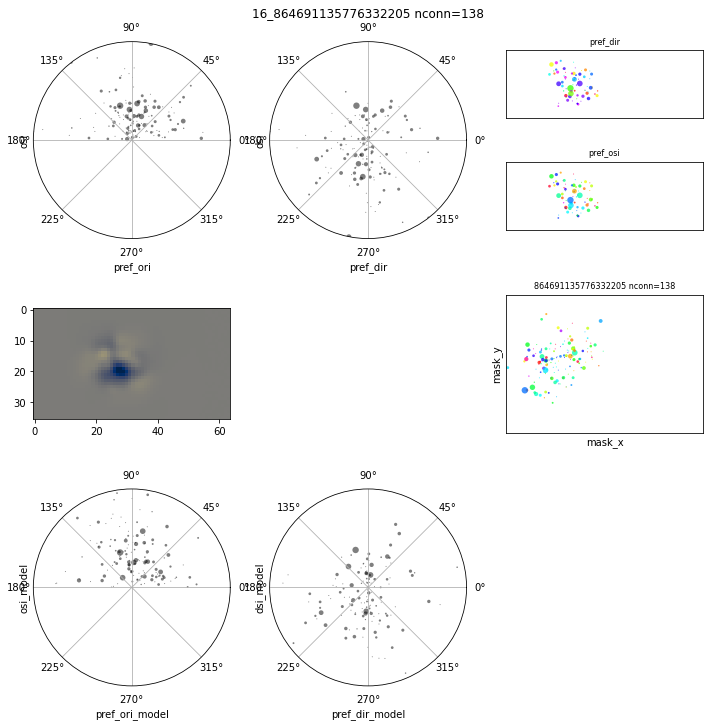

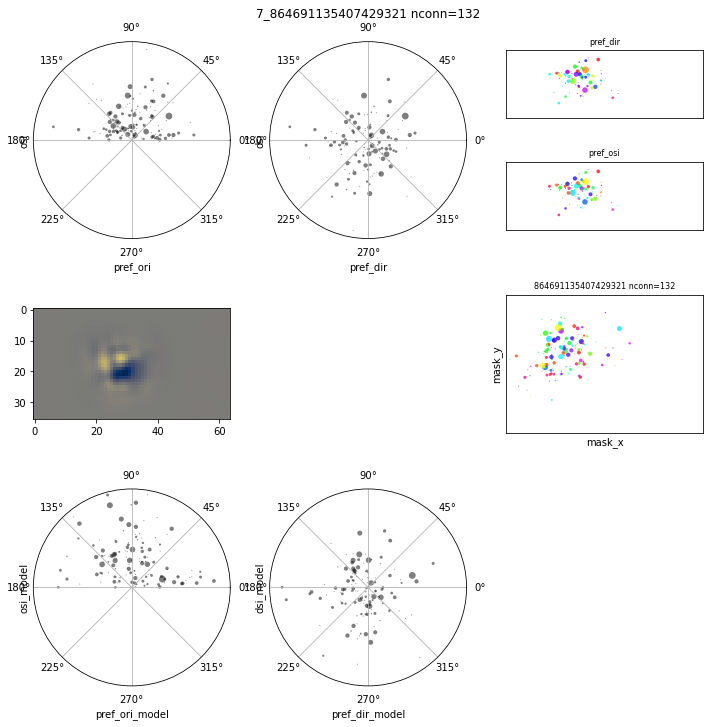

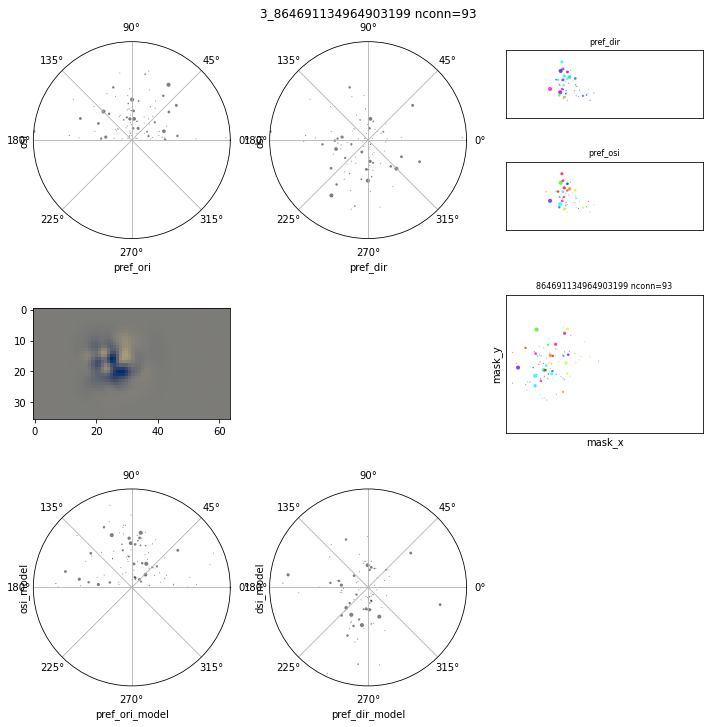

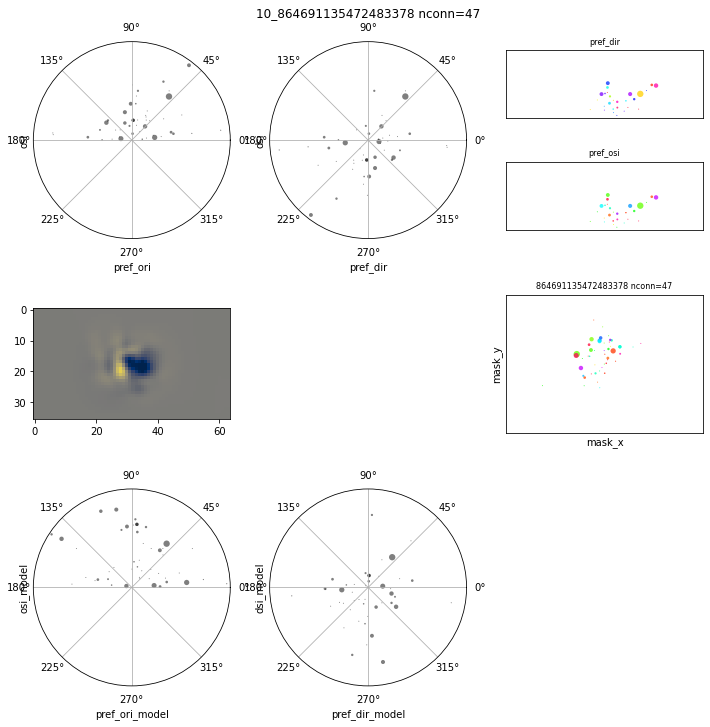

In [127]:
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt

# Create the PdfPages object to which we will save the pages:
# The with statement makes sure that the PdfPages object is closed properly at
# the end of the block, even if an Exception occurs.

with PdfPages('thalamic_axons_10_11_2022c.pdf') as pdf:

    for root_id, grp_df in axon_grps:
        ann_id=selected_ann_df.query(f'pt_root_id=={root_id}').iloc[0,0]
        f = plt.figure(figsize=(12,12))
        gs = f.add_gridspec(6,3)
          
        ax1 = f.add_subplot(gs[0:2,0],projection='polar')
        sns.scatterplot(data=grp_df, x='pref_ori',
                        y='osi',size='sum_size', sizes=(1,50),
                        c='k',alpha=.5, linewidth=0,
                        size_norm=size_norm,ax=ax1,legend=None)
        ax1.set_ylim(0,np.percentile(tuning_df.osi,[99])[0])
        ax1.set_yticks([])
        
        ax2 = f.add_subplot(gs[0:2,1],projection='polar')
        sns.scatterplot(data=grp_df, x='pref_dir',
                        y='dsi',size='sum_size', c='k',
                        alpha=.5, linewidth=0, sizes=(1,50),
                        size_norm=size_norm,ax=ax2,legend=None)
        
        ax2.set_ylim(0,np.percentile(tuning_df.dsi,[99])[0])
        ax2.set_yticks([])
        #ax.set_yscale('log')
        ax2.set_title(f'{ann_id}_{root_id} nconn={len(grp_df)}')
        
        
        ax7 = f.add_subplot(gs[4:6,0],projection='polar')
        sns.scatterplot(data=grp_df, x='pref_ori_model',
                        y='osi_model',size='sum_size', sizes=(1,50),
                        c='k',alpha=.5, linewidth=0,
                        size_norm=size_norm,ax=ax7,legend=None)
        ax7.set_ylim(0,np.percentile(tuning_df.osi_model,[99])[0])
        ax7.set_yticks([])
        
        ax8 = f.add_subplot(gs[4:6,1],projection='polar')
        sns.scatterplot(data=grp_df, x='pref_dir_model',
                        y='dsi_model',size='sum_size', c='k',
                        alpha=.5, linewidth=0, sizes=(1,50),
                        size_norm=size_norm,ax=ax8,legend=None)
        
        ax8.set_ylim(0,np.percentile(tuning_df.dsi_model,[99])[0])
        ax8.set_yticks([])
        
        
        
        ax3 = f.add_subplot(gs[0,2])


        out=sns.scatterplot(data=grp_df.query('dsi>.1'), x='pt_position_x', y='pt_position_z', hue='pref_dir', 
                        alpha=.75, sizes=(1,50), linewidth=0,legend=False, size='sum_size',palette='hsv',
                        size_norm=size_norm, hue_norm=dir_norm, ax=ax3)

        ax3.set_title(f'pref_dir',size=8)
        ax3.set_xlim(nrn_df.pt_position_x.min(),nrn_df.pt_position_x.max())
        ax3.set_ylim(nrn_df.pt_position_z.min(),nrn_df.pt_position_z.max())
        ax3.set_xticks([])
        ax3.set_yticks([])
        ax3.set_xlabel("")
        ax3.set_ylabel("")
        ax3.set_aspect('equal')
        
        ax4 = f.add_subplot(gs[1,2])
        
        out=sns.scatterplot(data=grp_df.query('osi>.1'), x='pt_position_x', y='pt_position_z', hue='pref_ori', 
                        alpha=.75, sizes=(1,50), legend=False, linewidth=0,size='sum_size',palette='hsv',
                        size_norm=size_norm, hue_norm=ori_norm, ax=ax4)

        ax4.set_title(f'pref_osi',size=8)
        ax4.set_xlim(nrn_df.pt_position_x.min(),nrn_df.pt_position_x.max())
        ax4.set_ylim(nrn_df.pt_position_z.min(),nrn_df.pt_position_z.max())
        ax4.set_xticks([])
        ax4.set_yticks([])
        ax4.set_xlabel("")
        ax4.set_ylabel("")
        ax4.set_aspect('equal')
        
        df_mei_merge=grp_df.merge(mei_df, left_on=['session', 'scan_idx', 'unit_id'],
        right_on=['scan_session', 'scan_idx', 'unit_id'])
        meis= np.stack(df_mei_merge.mei.values)
        weights = np.log(df_mei_merge.sum_size.values)
        weights=weights/np.sum(weights)
        ax = f.add_subplot(gs[2:4,0])
        m=ax.imshow(np.sum(meis*weights[:,np.newaxis, np.newaxis], axis=0), vmax=.2, vmin=-.2,
                  cmap=plt.cm.cividis)
        
        ax = f.add_subplot(gs[2:4,2])
        sns.scatterplot(data=df_mei_merge, x='mask_x', y='mask_y', size='sum_size', 
                    sizes=(1,50),size_norm=size_norm, ax=ax,  palette='hsv',alpha=.75, linewidth=0,
                        hue='pref_ori', hue_norm=ori_norm, legend=False)

        ax.set_title(f'{root_id} nconn={len(grp_df)}',size=8)
        ax.set_xlim(-10,10)
        ax.set_ylim(-7,7)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_aspect('equal')


        ax = f.add_subplot(gs[2:4,1])
        
        mei_pre=coreg_df.query(f'pt_root_id=={root_id}').merge(mei_df, left_on=['session', 'scan_idx', 'unit_id'],
                               right_on=['scan_session', 'scan_idx', 'unit_id']).mei
        if (len(mei_pre)>0):
            m=ax.imshow(mei_pre.iloc[0], vmax=.2, vmin=-.2,
                  cmap=plt.cm.cividis)
        else:
            ax.axis('off')
        tuning_pre = tuning_coreg.query(f'pt_root_id=={root_id}')
        if (len(tuning_pre)>0):
            sns.scatterplot(data=tuning_pre, x='pref_ori',
                        y='osi', marker='o', color='r',alpha=.5,s=40,ax=ax1,legend=None)
        
        
            sns.scatterplot(data=tuning_pre, x='pref_dir',
                            y='dsi',marker='o', color='r',alpha=.5, s=40,ax=ax2,legend=None)
            sns.scatterplot(data=tuning_pre, x='pref_ori_model',
                        y='osi_model', marker='o', color='r',alpha=.5,s=40,ax=ax7,legend=None)
        
        
            sns.scatterplot(data=tuning_pre, x='pref_dir_model',
                            y='dsi_model',marker='o', color='r',alpha=.5, s=40,ax=ax8,legend=None)

            
        #print(root_id)
        #break
        pdf.savefig(f)


In [245]:
selected_ann_df

,id,valid,classification_system,cell_type,pt_supervoxel_id,pt_root_id,pt_position
0,1,t,thalamic_axon,unsure,102128756021327176,864691136444286339,"[271497, 237346, 14920]"
1,2,t,thalamic_axon,unsure,115149310962011293,864691135013439638,"[366518, 254764, 21495]"
2,3,t,thalamic_axon,unsure,99806587799037375,864691134964903199,"[254921, 237606, 17480]"
3,4,t,thalamic_axon,unsure,90732112780513834,864691136066004888,"[188523, 260314, 22042]"
4,5,t,thalamic_axon,unsure,85026747413781557,864691135341526981,"[147379, 219840, 25649]"
5,6,t,thalamic_axon,unsure,91357528537421606,864691135777125472,"[193545, 201734, 20916]"
6,7,t,thalamic_axon,unsure,100155270088917657,864691135407429321,"[257348, 214049, 15355]"
7,8,t,thalamic_axon,unsure,89673694460402979,864691135416162490,"[181165, 239291, 15002]"
8,16,t,thalamic_axon,unsure,82138192593237606,864691135776332205,"[126409, 194171, 23202]"
9,23,t,thalamic_axon,unsure,93115990556086278,864691135463972165,"[206203, 196178, 15382]"


/var/folders/kx/xq42kw197c5_qw6kxgnr4nkr0000gq/T/ipykernel_91705/1763395100.py:5: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  ax.pcolormesh(azimuths*np.pi/180.0, zeniths, values, cmap=plt.cm.hsv)


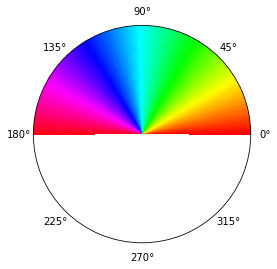

In [94]:
azimuths = np.arange(0, 181, 1)
zeniths = np.arange(40, 70, 1)
values = azimuths * np.ones((30, 181))
fig, ax = plt.subplots(subplot_kw=dict(projection='polar'))
ax.pcolormesh(azimuths*np.pi/180.0, zeniths, values, cmap=plt.cm.hsv)
ax.set_yticks([])
plt.show()

/var/folders/kx/xq42kw197c5_qw6kxgnr4nkr0000gq/T/ipykernel_91705/1891065152.py:5: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  ax.pcolormesh(azimuths*np.pi/180.0, zeniths, values, cmap=plt.cm.hsv)


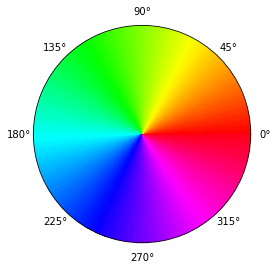

In [95]:
azimuths = np.arange(0, 361, 1)
zeniths = np.arange(40, 70, 1)
values = azimuths * np.ones((30, 361))
fig, ax = plt.subplots(subplot_kw=dict(projection='polar'))
ax.pcolormesh(azimuths*np.pi/180.0, zeniths, values, cmap=plt.cm.hsv)
ax.set_yticks([])
plt.show()

In [85]:
ori_norm

In [65]:
tuning_pre = tuning_coreg.query(f'pt_root_id=={root_id}')

In [66]:
tuning_pre

,scan_idx,unit_id,direction,response_mean,osi,dsi,pref_dir,pref_ori,oracle,id,pt_root_id,session
8808,4,7558,"[0.0, 0.3839724354387525, 0.7853981633974483, ...","[2.16755, 1.41901, 0.635291, 0.910044, 3.67683...",0.309749,0.105653,5.01889,1.877297,0.053425,2317,864691137020060270,9


In [183]:
client.chunkedgraph.get_tabular_change_log(864691135867025686)

{864691135867025686:     operation_id      timestamp user_id  \
 4          95194  1596471691879     161   
 10        318832  1644527699763    1809   
 16        365496  1649617592322     161   
 17        365503  1649617849757     161   
 21        365535  1649619320095     161   
 
                              before_root_ids        after_root_ids  is_merge  \
 4   [864691135580131892, 864691135730208441]  [864691135926342100]      True   
 10                      [864691134947746044]  [864691135865011676]     False   
 16                      [864691136973991964]  [864691136483293740]     False   
 17                      [864691136483293740]  [864691136134860939]     False   
 21                      [864691135815904847]  [864691135867025686]     False   
 
           user_name user_affiliation  
 4   Forrest Collman                   
 10       E Phillips                   
 16  Forrest Collman                   
 17  Forrest Collman                   
 21  Forrest Collman      

In [194]:
datetime.datetime.utcfromtimestamp(1649619320095//1000)

datetime.datetime(2022, 4, 10, 19, 35, 20)

In [184]:
client.chunkedgraph.get_operation_details([365535])

{'365535': {'bb_offset': [240, 240, 24],
  'operation_exception': '',
  'operation_status': 0,
  'operation_ts': '2022-04-10 19:35:20.095000+00:00',
  'removed_edges': [[86358530940459314, 86358530940467741],
   [86358530940459314, 86358530940467951],
   [86358530940459329, 86358530940467741],
   [86358530940459329, 86358530940467951],
   [86358530940459351, 86358530940463971],
   [86358530940459351, 86358530940466515],
   [86358530940460864, 86358530940467563],
   [86358530940460864, 86358530940470762],
   [86358530940460864, 86358530940470776],
   [86358530940460865, 86358530940463971],
   [86358530940460880, 86358530940471499],
   [86358530940460916, 86358530940467741],
   [86358530940460916, 86358530940467951],
   [86358530940460940, 86358530940463971],
   [86358530940460940, 86358530940466515],
   [86358530940460940, 86358530940467741],
   [86358530940460940, 86358530940467951],
   [86358530940460940, 86358530940470762],
   [86358530940460940, 86358530940471499],
   [8635853094046

In [182]:
nrn_df.query('pt_root_id==864691135867025686')

,id,pt_position_x,pt_position_y,pt_position_z,pt_root_id
21658,226837,636.352,607.104,1041.04,864691135867025686


In [179]:
client.chunkedgraph.get_lineage_graph(864691136973991964)

{'directed': True,
 'graph': {},
 'links': [{'source': 864691136973991964, 'target': 864691136483293740},
  {'source': 864691135526326619, 'target': 864691136973991964},
  {'source': 864691136483293740, 'target': 864691136134860939},
  {'source': 864691136521924241, 'target': 864691135526326619},
  {'source': 864691136134860939, 'target': 864691135867025430},
  {'source': 864691136521923985, 'target': 864691136521924241},
  {'source': 864691135867025430, 'target': 864691136662498270},
  {'source': 864691135293387276, 'target': 864691136521923985},
  {'source': 864691136662498270, 'target': 864691135815904847},
  {'source': 864691135865011676, 'target': 864691135293387276},
  {'source': 864691135815904847, 'target': 864691136065890712},
  {'source': 864691135815904847, 'target': 864691135867025686},
  {'source': 864691134947746044, 'target': 864691135865011676},
  {'source': 864691136065890712, 'target': 864691136952258527},
  {'source': 864691135865004252, 'target': 864691134947746044}

In [247]:
client.chunkedgraph.get_root_timestamps

<bound method ChunkedGraphClientV1.get_root_timestamps of <caveclient.chunkedgraph.ChunkedGraphClientV1 object at 0x7fbcd3ccdbe0>>